# Análisis de Datos de Colegios GP y MS

Se disponen de 2 archivos .csv donde el primero contiene alumnos de Portugués de 2 colegios (GP y MS) y el segundo archivo contiene alumnos de Matemática que también estudian en ambos colegios.  
Se pretende unir ambos archivos para luego imprimir la cantidad de alumnos que fueron mezclados y los que quedaron afuera por materia y colegio

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

por = pd.read_csv('./data/student-por.csv', sep=';') #Lectura del archivo de Portugués
mat = pd.read_csv('./data/student-mat.csv', sep=';') #Lectura del archivo de Matemática

In [13]:
print(por.shape)
print(mat.shape)

(649, 33)
(395, 33)


El archivo de alumnos de Portugués posee 649 registros y el de Matemática 395.  
Evalúo cuántos pertenecen a cada colegio en ambos archivos:

In [15]:
por_g = por['school'].value_counts().sort_index(ascending=True)
mat_g = mat['school'].value_counts().sort_index(ascending=True)
print(por_g)
print(mat_g)

GP    423
MS    226
Name: school, dtype: int64
GP    349
MS     46
Name: school, dtype: int64


Del total de 649 en Portugués, 423 estudian en GP y 226 en MS  
Y del total de 395 en Matemática, 349 estudian en GP y 46 en MS  
Representación grafica de estos datos: 

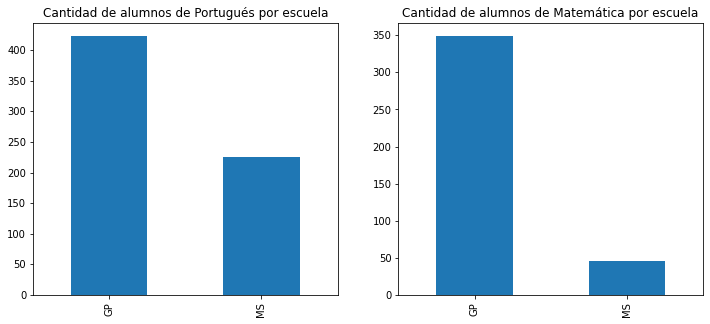

In [16]:
plt.figure(figsize=(12,5)) 

plt.subplot(1,2,1)
por_g.plot(kind='bar')
plt.title('Cantidad de alumnos de Portugués por escuela')

plt.subplot(1,2,2)
mat_g.plot(kind='bar')
plt.title('Cantidad de alumnos de Matemática por escuela')

plt.show()

# Unión de ambos archivos  
Ambos archivos no tienen un ID por cada alumno, por lo que la unión debe ser dada por las características de las siguientes columnas: 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'.

In [21]:
m = pd.merge(por, mat, how='inner', suffixes=('_m', '_p'), on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 
'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'])
m2 = m[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']]

In [18]:
m2.shape

(382, 13)

382 alumnos fueron mezclados, por lo tanto estudian Matemática y Portugués.  
Evalúo cuántos estudian en cada colegio:

In [24]:
m2_g = m2['school'].value_counts()
m2_g

GP    342
MS     40
Name: school, dtype: int64

De estos 382 alumnos, 342 pertenecen a GP y 40 MS.  
Representación gráfica: 

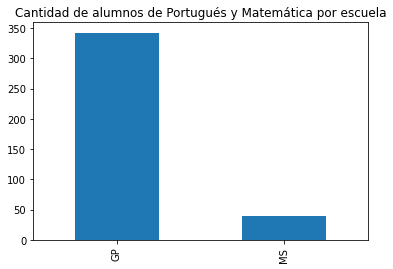

In [25]:
m2_g.plot(kind='bar')
plt.title('Cantidad de alumnos de Portugués y Matemática por escuela')

plt.show()

# Conclusión: 

382 estudian Matemática y Portugués (342 GP y 40 MS)  

De los alumnos de Portugués:  
Si 423 son de GP y 226 son de MS  
423 GP(Por) - 342 merge(GP) = 81  
226 MS(Por) - 40 merge(MS) = 186      
Entonces 267 estudian Portugués y no Matemática, 81 estudian en GP y 186 en MS

De los alumnos de Matemática:    
Si 349 son de GP y 46 son de MS  
349 GP(Mate) - 342 merge(GP) = 7  
46 MS(Mate) - 40 merge(MS) = 6  
Entonces 13 estudian Matemática y no Portugués. 7 estudian en GP y 6 en MS.

# Filtro de Datos

1- Los Coordinadores disciplinares quieren indentificar cuales alumnos tuvieron las notas mayores que 10 en el primer período (G1) en ambas disciplinas y que la mamá sea profesora 

In [6]:
item1 = m[(m['G1_m'] > 10) & (m['G1_p'] > 10) & (m['Mjob'] == 'teacher')]
print(item1.value_counts('school'))

school
GP    26
MS     3
dtype: int64


26 Alumnos pertenecen a GP y 3 a MS. Listado de alumnos:  

In [9]:
item1 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_p,freetime_p,goout_p,Dalc_p,Walc_p,health_p,absences_p,G1_p,G2_p,G3_p
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,12,13,14
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,0,12,13,14
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0,13,14,15
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,0,14,14,14
48,GP,M,15,U,GT3,T,4,2,teacher,other,...,4,3,3,2,2,5,4,11,12,13
57,GP,M,15,U,GT3,T,4,4,teacher,health,...,3,2,2,1,1,5,8,15,15,16
65,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,16
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,0,12,11,11
96,GP,F,16,U,GT3,T,4,2,teacher,services,...,5,3,3,1,1,1,2,13,14,14
116,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,5,3,1,1,4,4,13,14,14


2- Generar un informe de alumnos que tuvieron notas inferiores a 6 en los 2 primeros períodos G1 y G2 y que tengan madres profesoras. 

In [7]:
item2 = m[(m['G1_m'] < 6) & (m['G2_m'] < 6) | (m['G1_p'] < 6) & (m['G2_p'] < 6) & (m['Mjob'] == 'teacher')]
print(item2.value_counts('school'))

school
GP    7
dtype: int64


Sólo se presentan 7 alumnos de GP y ninguno de MS. Listado de alumnos:  

In [10]:
item2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_p,freetime_p,goout_p,Dalc_p,Walc_p,health_p,absences_p,G1_p,G2_p,G3_p
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
80,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,0,9,9,10
81,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
82,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,4,3,1,2,3,14,12,11,11
145,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,4,9,9,10
159,GP,M,19,U,GT3,T,3,2,services,at_home,...,4,5,4,1,1,4,6,11,9,11
250,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,10,9,10


print('''15.2% de GP
0% de MS''')

3- Porcentaje de alumnos que tuvieron ayuda extra-curricular segmentado por colegios

In [31]:
item3 = m[(m['schoolsup_m']=='yes') | (m['schoolsup_p']=='yes')]
item3.shape

(52, 53)

In [32]:
item3['school'].value_counts()

GP    52
Name: school, dtype: int64

No se observan valores de MS

In [27]:
m['school'].value_counts()

GP    342
MS     40
Name: school, dtype: int64

Calculo el porcentaje para los alumnos de GP siendo 52 la cantidad de alumnos sobre la cantidad total de 342 calculado en la anterior línea de código

In [33]:
porcentage = (52*100)/342
print(porcentage)

15.2046783625731


Por lo tanto, el porcentaje de alumnos con ayuda extra-curricular por colegios:  
-   15.2% GP  
-   0% MS

4- Revisar el modelo y adicionar alguna informacion que sea relevante a los Coodinadores Disciplinares.

Adicionar número de identificación de cada alumno para llevar un mejor control en el análisis de datos y no depender de las variables independientes.